# Regressão Linear e Polinomial


#### Alguns imports basicos

Outros serao incluidos ao longo do notebook

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Brincadeiras com Numpy

#### Testando diferentes graus

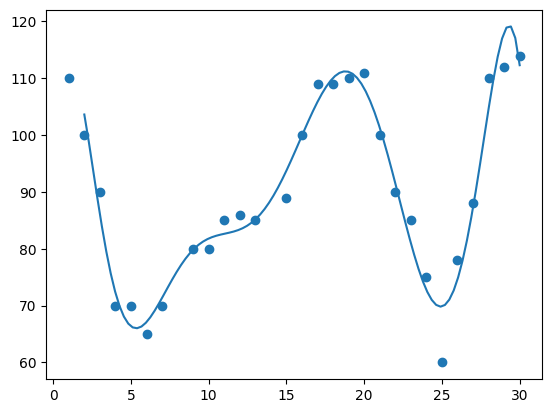

In [8]:
x = [1,2,3,4,5,6,7,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
y = [110,100,90,70,70,65,70,80,80,85,86,85,89,100,109,109,110,111,100,90,85,75,60,78,88,110,112,114]

model = np.poly1d(np.polyfit(x, y, 9))

line = np.linspace(2, 30, 100)

plt.scatter(x, y)
plt.plot(line, model(line))
plt.show()

#### Observando a eficacia

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#gerando o modelo
#verificar para outros graus
model = np.poly1d(np.polyfit(x, y, 11))

#predicao
y_pred = model(x)

print('RMSE:',np.sqrt(mean_squared_error(y,y_pred)))
print('r2_score:', r2_score(y, y_pred))

RMSE: 3.0232451021663906
r2_score: 0.963998891781906


#### Exemplo de **boa predicao**
(conferir no grafico acima)

In [10]:
model = np.poly1d(np.polyfit(x, y, 3))

#8 ou 14 (sao bons exemplos pois nao estao em x)
y_pred = model(8)
print('Predicao: ', y_pred)

Predicao:  82.07780862412615


#### Exemplo de **cenario ruim** para **Regressao Polinomial**

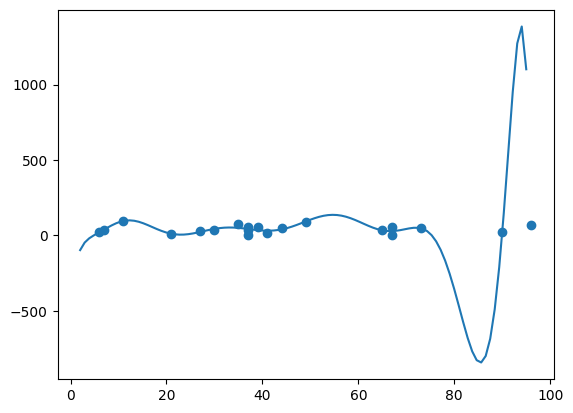

In [11]:
x = [90,44,37,37,96,11,67,35,39,21,27,30,49,65,7,6,37,67,73,41]
y = [22,47,4,36,68,96,54,73,59,11,27,35,91,34,39,21,57,3,48,16]

model = np.poly1d(np.polyfit(x, y, 12))

line = np.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(line, model(line))
plt.show()

#### Avaliando com r2_score

In [12]:
model = np.poly1d(np.polyfit(x, y, 10))

print(r2_score(y, model(x)))

0.6238577273920937


## Brincadeiras com Scikit Learn

#### Criando um dataset ficticio

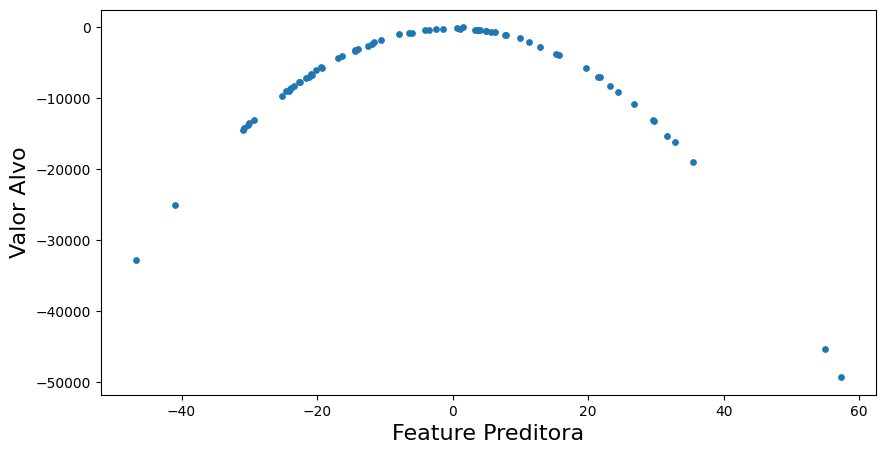

In [13]:
# dataset
x=20*np.random.normal(0,1,70)
y=15*(-x**2)+np.random.normal(-100,100,70)

# plot
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Feature Preditora',fontsize=16)
plt.ylabel('Valor Alvo',fontsize=16)
plt.show()

#### Predicao com Regressao Linear

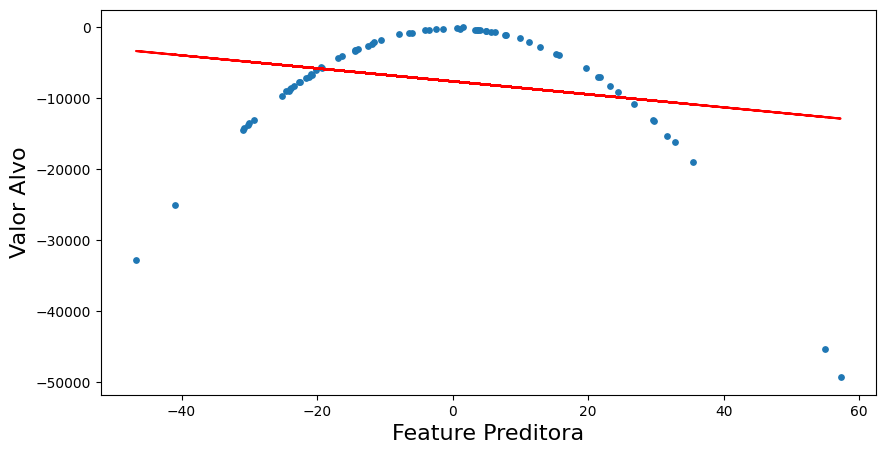

In [14]:
from sklearn.linear_model import LinearRegression

#treino
linmodel=LinearRegression()
linmodel.fit(x.reshape(-1,1),y.reshape(-1,1))

#predicao
y_pred=linmodel.predict(x.reshape(-1,1))

# plot
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Feature Preditora',fontsize=16)
plt.ylabel('Valor Alvo',fontsize=16)
plt.show()

In [15]:
print('RMSE (Reg. Linear): ',np.sqrt(mean_squared_error(y,y_pred)))
print('r2_score (Reg. Linear): ',r2_score(y,y_pred))

RMSE (Reg. Linear):  9054.413208770344
r2_score (Reg. Linear):  0.04623224540377069


#### Gerando o modelo polinomial com **pipeline**

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# criando o pipeline
Input=[('polyfeatures',PolynomialFeatures(degree=10)),('regmodel',LinearRegression())]
pipe=Pipeline(Input)

# fit do pipeline nos dados
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=10)),
                ('regmodel', LinearRegression())])

#### Fazendo uma predicao

In [17]:
pipe.predict([[-22]])

array([[-7354.42529833]])

#### Plotando as predicoes (Linear e Polinomial)

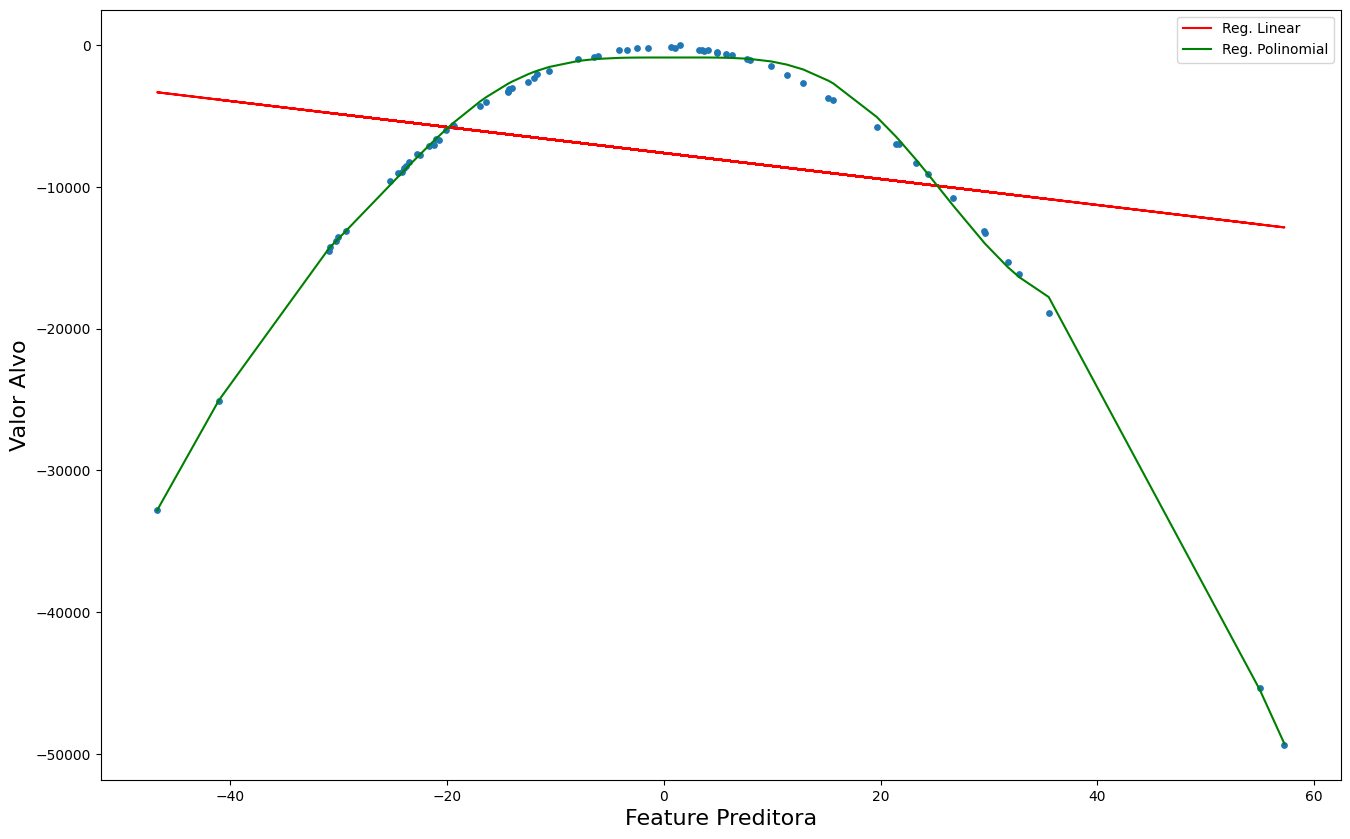

In [18]:
#predicoes
poly_pred=pipe.predict(x.reshape(-1,1))

#ordenando y em relacao a x (para visualizacao)
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred_sorted = zip(*sorted_zip)

#plot
plt.figure(figsize=(16,10))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Reg. Linear')
plt.plot(x_poly,poly_pred_sorted,color='g',label='Reg. Polinomial')
plt.xlabel('Feature Preditora',fontsize=16)
plt.ylabel('Valor Alvo',fontsize=16)
plt.legend()
plt.show()

#### Plotando as predicoes com scatter maior

<ipython-input-19-2425116770>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


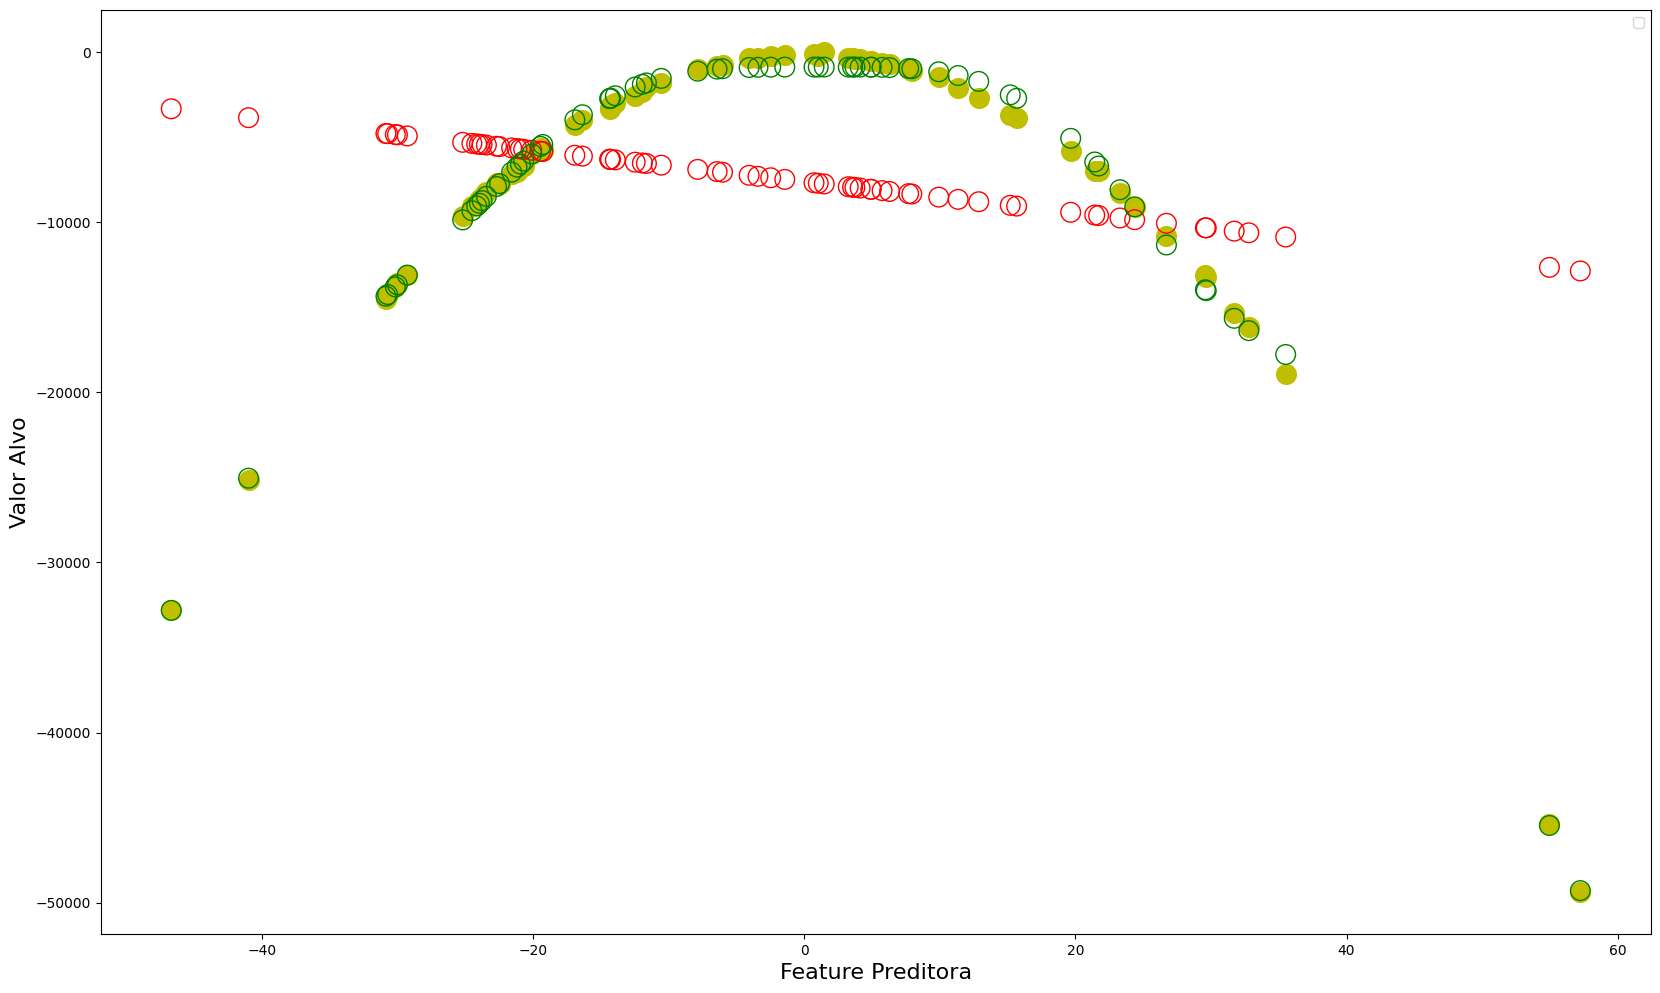

In [19]:
#predicoes
poly_pred=pipe.predict(x.reshape(-1,1))

#plot
plt.figure(figsize=(20,12))
plt.scatter(x,y,s=200,color='y') # valores esperados
plt.scatter(x,y_pred,s=200,facecolors='none', edgecolors='r') # pred. reg. linear
plt.scatter(x,poly_pred,s=200,facecolors='none', edgecolors='g') # pred. reg. polinomial
plt.xlabel('Feature Preditora',fontsize=16)
plt.ylabel('Valor Alvo',fontsize=16)
plt.legend()
plt.show()

#### Comparando a Eficacia (Linear vs Polinomial)

In [20]:
print('RMSE (Polinomial): ',np.sqrt(mean_squared_error(y,poly_pred)))
print('r2_score (Polinomial): ', r2_score(y,poly_pred))

print()

print('RMSE (Reg. Linear): ',np.sqrt(mean_squared_error(y,y_pred)))
print('r2_score (Reg. Linear): ', r2_score(y,y_pred))

RMSE (Polinomial):  475.31237260188846
r2_score (Polinomial):  0.9973716678108581

RMSE (Reg. Linear):  9054.413208770344
r2_score (Reg. Linear):  0.04623224540377069


## Observando os atributos

#### Regressao Linear

In [21]:
linmodel.coef_

array([[-91.69622591]])

In [22]:
linmodel.intercept_

array([-7615.17737977])

Regressao Polinomial

In [23]:
pipe

Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=10)),
                ('regmodel', LinearRegression())])

In [24]:
pipe.named_steps['regmodel'] == pipe[1] == pipe.steps[1][1]

True

In [25]:
m = pipe.named_steps['regmodel']

In [26]:
m.intercept_

array([-878.74471888])

In [27]:
m.coef_

array([[ 0.00000000e+00,  8.48209355e-04, -2.46175950e-03,
         1.79975533e-01, -4.69940117e-02, -5.13728232e-04,
         5.21473450e-05,  4.22222637e-07, -2.31802025e-08,
        -9.85560673e-11,  3.64216155e-12]])